**Project:** Data Minining Project for  X company

The CRISP-DM Framework


The CRISP-DM methodology provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.
* Business understanding (BU): Determine Business Objectives, Assess Situation, Determine Data Mining Goals, Produce Project Plan

* Data understanding (DU): Collect Initial Data, Describe Data, Explore Data, Verify Data Quality

* Data preparation (DP): Select Data, Clean Data, Construct Data, Integrate Data

* Modeling (M): Select modeling technique, Generate Test Design, Build Model, Assess Model
*  Evaluation (E): Evaluate Results, Review Process, Determine Next Steps
*  Deployment (D): Plan Deployment, Plan Monitoring and Maintenance, Produce Final Report, Review Project


References:

[What is the CRISP-DM methodology?](https://www.sv-europe.com/crisp-dm-methodology/)

[Introduction to CRISP DM Framework for Data Science and Machine Learning](https://www.linkedin.com/pulse/chapter-1-introduction-crisp-dm-framework-data-science-anshul-roy/)

**Data Set**
### The data is for company X which is trying to control attrition. 
### There are two sets of data: "Existing employees" and "Employees who have left". The following attributes are available for every employee.


*   Satisfaction Level

*   Last evaluation

*   Number of projects

*   Average monthly hours

*   Time spent at the company
*   Whether they have had a work accident


*  Whether they have had a promotion in the last 5 years


*   Departments (column sales)


*   Salary


*  Whether the employee has left


















**Your Role**
 

*   As data science team member X company asked you to answer this two questions.
*  What type of employees is leaving? 

*   Determine which employees are prone to leave next.






Business Understanding

---

This step mostly focuses on understanding the Business in all the different aspects. It follows the below different steps.




* Identify the goal and frame the business problem.
* Prepare Analytical Goal i.e. what type of performance metric and loss function to use
* Gather information on resource, constraints, assumptions, risks etc
* Gather information on resource, constraints, assumptions, risks etc
*   Prepare Work Flow Chart

### Write the main objectives of this project in your words?
minimum of 100 characters

In [1]:
main_objectives ='''
The main objective is to use data science skills and modelling techniques to understand different charcteriestics of employees 
who are leaving the company as well as those who are likely to leave or who have most chances to leave
'''

In [2]:
assert len(main_objectives) > 100 
### BEGIN HIDDEN TESTS
assert len(main_objectives) > 80 
### END HIDDEN TESTS

### Outline the different data analysis steps you will follow to carry out the project

In [3]:
dm_outline = '''
The first step in data analysis will be to clean the dataset, removing the duplicates and solving or cleaning the outliers.
The do tabulations and visualization of different variables to understand their distribution and well as to get the general idea on data distribution
'''

In [4]:
assert len(dm_outline) > 100 
### BEGIN HIDDEN TESTS
assert len(dm_outline) > 70 
### END HIDDEN TESTS

### What metrics will you use to measure the performance of your data analysis model? 
Write the equations of the metrics here

e.g. Precision = $\frac{TP}{(TP + FP)}$



In [5]:
"""
I can use the accuracy by checking the number of errors made or correct predictions made. 

I can use different accuracy metrics like: Accuracy, Recall, Precision, and F1- Score


Specifically, as in this case we have only two classes, I can use the "The Confusion Matrix"


a. Accuracy = Number of correct predictions / Total number of predictions.

Accuracy = (True  positive + true negative ) /(True  Positive + True Negative + False Negative + False Positive)



Reference: https://www.analyticsvidhya.com/blog/2020/10/how-to-choose-evaluation-metrics-for-classification-model/
"""

'\nI can use the accuracy by checking the number of errors made or correct predictions made. \n\nI can use different accuracy metrics like: Accuracy, Recall, Precision, and F1- Score\n\n\nSpecifically, as in this case we have only two classes, I can use the "The Confusion Matrix"\n\n\na. Accuracy = Number of correct predictions / Total number of predictions.\n\nAccuracy = (True  positive + true negative ) /(True  Positive + True Negative + False Negative + False Positive)\n\n\n\nReference: https://www.analyticsvidhya.com/blog/2020/10/how-to-choose-evaluation-metrics-for-classification-model/\n'

Why do you choose these metrics? minimum of 100 characters

In [6]:
why_metrics = '''Add your answer text here
you can create python string using (') or (") or 3('), like the text here. The 3(') string can be used 
to write paragraphs, comments in the beginning of functions, etc.. Your answer to the above question 
should replace this text.
'''

In [7]:
assert len(why_metrics) > 100 
### BEGIN HIDDEN TESTS
assert len(why_metrics) > 80 
### END HIDDEN TESTS

### How would you know if your data analysis work is a success or not?
minimum of 100 characters

In [8]:
how_success = '''
My analysis will be a success if the classification accuracy is very high, 
meaning that I am able to correctly classify every employee in the category where they should be classified.
'''

In [9]:
assert len(how_success) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

## What kind of challenges do you expect in your analysis?
List at least 3 challenges

In [10]:
challenge_text = '''
1. A lot of data cleanings are expected as many variables are in text and same responces may be named in different ways
2. removing variables that are not contributing too much to the model.
3. Also, there might be missing of relevant variables that may lead to influencing employers to leave the company


'''

In [11]:
assert len(challenge_text) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

<h2>Using the processed twitter data from yesterday's challenge</h2>.


- Form a new data frame (named `cleanTweet`), containing columns $\textbf{clean-text}$ and $\textbf{polarity}$.

- Write a function `text_category` that takes a value `p` and returns, depending on the value of p, a string `'positive'`, `'negative'` or `'neutral'`.

- Apply this function (`text_category`) on the $\textbf{polarity}$ column of `cleanTweet` in 1 above to form a new column called $\textbf{score}$ in `cleanTweet`.

- Visualize The $\textbf{score}$ column using piechart and barchart

<h5>Now we want to build a classification model on the clean tweet following the steps below:</h5>

* Remove rows from `cleanTweet` where $\textbf{polarity}$ $= 0$ (i.e where $\textbf{score}$ = Neutral) and reset the frame index.
* Construct a column $\textbf{scoremap}$ Use the mapping {'positive':1, 'negative':0} on the $\textbf{score}$ column
* Create feature and target variables `(X,y)` from $\textbf{clean-text}$ and $\textbf{scoremap}$ columns respectively.
* Use `train_test_split` function to construct `(X_train, y_train)` and `(X_test, y_test)` from `(X,y)`

* Build an `SGDClassifier` model from the vectorize train text data. Use `CountVectorizer()` with a $\textit{trigram}$ parameter.

* Evaluate your model on the test data.


In [12]:
# Importing needed libralies

import pandas as pd

In [13]:
#Importing the dataset

dataset = pd.read_csv('cleaned_fintech_data.csv')
dataset.head()

,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp
0,0.0,Thu Jun 17 06:26:34 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,"Sentiment(polarity=0.3194444444444445, subject...",0.3194444444444445,0.5305555555555556,en,0,...,reen_law,398,70,223,NaN,NaN,janetmachuka_,NaN,NaN,2021-06-17 06:26:34+00:00
1,1.0,Thu Jun 17 06:26:37 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,in,0,...,Amigo9999_,19047,132,1084,NaN,NaN,maheshblood,NaN,India,2021-06-17 06:26:37+00:00
2,2.0,Thu Jun 17 06:26:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,hi,0,...,MallaSuhaas,47341,2696,2525,NaN,NaN,Hail_Kalyan,NaN,Vizag,2021-06-17 06:26:42+00:00
3,3.0,Thu Jun 17 06:26:44 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,...,CIACOceania,7039,343,387,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,Papua New Guinea,2021-06-17 06:26:44+00:00
4,4.0,Thu Jun 17 06:26:47 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,"Sentiment(polarity=0.5, subjectivity=0.8333333...",0.5,0.8333333333333334,en,0,...,MccarronWendy,26064,419,878,NaN,"GregHunt, Morrison",WriteWithDave,NaN,"Sydney, New South Wales",2021-06-17 06:26:47+00:00


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5620 non-null   float64
 1   created_at              5621 non-null   object 
 2   source                  5621 non-null   object 
 3   original_text           5621 non-null   object 
 4   clean_text              5617 non-null   object 
 5   sentiment               5621 non-null   object 
 6   polarity                5621 non-null   object 
 7   subjectivity            5621 non-null   object 
 8   lang                    5621 non-null   object 
 9   favorite_count          5621 non-null   object 
 10  retweet_count           5621 non-null   object 
 11  original_author         5621 non-null   object 
 12  screen_count            5621 non-null   object 
 13  followers_count         5621 non-null   object 
 14  friends_count           5621 non-null   

In [15]:
# Form a new data frame (named cleanTweet), containing columns  𝐜𝐥𝐞𝐚𝐧-𝐭𝐞𝐱𝐭  and  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲 .

In [16]:
cleanTweet = dataset[['clean_text', 'polarity' ]]
cleanTweet

,clean_text,polarity
0,Giving forth life becoming burden Kenya This m...,0.3194444444444445
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,0.0
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,0.0
3,Today World Day Combat Restoring degraded land...,0.25
4,Hearing say 's confident vaccines delivered li...,0.5
...,...,...
5616,Lambie voted AGAINST Medivac Carbon tax protec...,0.13636363636363635
5617,Idhi bathuku Most Day1 Records In Nizam Non BB...,0.5
5618,welkin moon giveaway bc finally money -u got t...,0.15416666666666667
5619,Manam edi chesina Daaniki kuda elevation istad...,0.0


In [17]:
# Write a function text_category that takes a value p and returns, depending on the value of p, a string 'positive', 'negative' or 'neutral'.
def text_category(p):
    if p>0:
        return "positive"
    elif p<0:
        return "negative"
    else:
        return "neutral"
    
text_category(9)

'positive'

In [18]:
cleanTweet['polarity']

0        0.3194444444444445
1                       0.0
2                       0.0
3                      0.25
4                       0.5
               ...         
5616    0.13636363636363635
5617                    0.5
5618    0.15416666666666667
5619                    0.0
5620                   0.13
Name: polarity, Length: 5621, dtype: object

In [19]:
#Cleaning the string polarity to numeric and replacing strings by null
cleanTweet['polarity'] = pd.to_numeric(cleanTweet['polarity'], errors='coerce')

<ipython-input-19-dc997b4e9ea8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanTweet['polarity'] = pd.to_numeric(cleanTweet['polarity'], errors='coerce')


In [20]:
cleanTweet

,clean_text,polarity
0,Giving forth life becoming burden Kenya This m...,0.319444
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,0.000000
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,0.000000
3,Today World Day Combat Restoring degraded land...,0.250000
4,Hearing say 's confident vaccines delivered li...,0.500000
...,...,...
5616,Lambie voted AGAINST Medivac Carbon tax protec...,0.136364
5617,Idhi bathuku Most Day1 Records In Nizam Non BB...,0.500000
5618,welkin moon giveaway bc finally money -u got t...,0.154167
5619,Manam edi chesina Daaniki kuda elevation istad...,0.000000


In [39]:
# Apply this function (text_category) on the  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲  column of cleanTweet in 1 above to form a new column called  𝐬𝐜𝐨𝐫𝐞  in cleanTweet.


cleanTweet['score'] = text_category(cleanTweet['polarity'].any().astype(float))


<ipython-input-39-630ba6729a0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanTweet['score'] = text_category(cleanTweet['polarity'].any().astype(float))


In [40]:
cleanTweet.tail()

,clean_text,polarity,score
5616,Lambie voted AGAINST Medivac Carbon tax protec...,0.136364,positive
5617,Idhi bathuku Most Day1 Records In Nizam Non BB...,0.500000,positive
5618,welkin moon giveaway bc finally money -u got t...,0.154167,positive
5619,Manam edi chesina Daaniki kuda elevation istad...,0.000000,positive
5620,This first time I 've seen Government media le...,0.130000,positive


In [41]:
#cleanTweet['score'] = text_category(cleanTweet['polarity'].any().astype(float))

# cleanTweet['score'] = text_category(cleanTweet['polarity'])

cleanTweet['score'] = cleanTweet['polarity'].apply(text_category)
    

<ipython-input-41-03593bca1813>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanTweet['score'] = cleanTweet['polarity'].apply(text_category)


In [42]:
cleanTweet

,clean_text,polarity,score
0,Giving forth life becoming burden Kenya This m...,0.319444,positive
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,0.000000,neutral
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,0.000000,neutral
3,Today World Day Combat Restoring degraded land...,0.250000,positive
4,Hearing say 's confident vaccines delivered li...,0.500000,positive
...,...,...,...
5616,Lambie voted AGAINST Medivac Carbon tax protec...,0.136364,positive
5617,Idhi bathuku Most Day1 Records In Nizam Non BB...,0.500000,positive
5618,welkin moon giveaway bc finally money -u got t...,0.154167,positive
5619,Manam edi chesina Daaniki kuda elevation istad...,0.000000,neutral


### Visualize The  𝐬𝐜𝐨𝐫𝐞  column using piechart and barchart

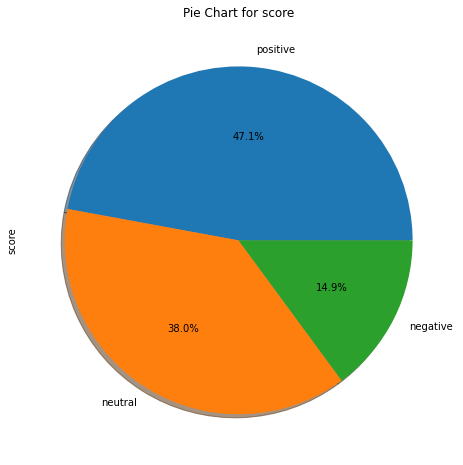

In [58]:
import seaborn as sns
cleanTweet['score'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for score')
plt.show()

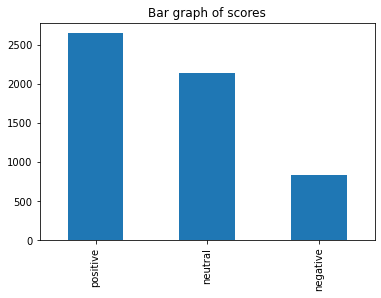

In [57]:
# Bar graph
cleanTweet['score'].value_counts().plot.bar()
plt.title('Bar graph of scores')
plt.show()

### Now we want to build a classification model on the clean tweet following the steps below:¶


#### Remove rows from cleanTweet where  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲   =0  (i.e where  𝐬𝐜𝐨𝐫𝐞  = Neutral) and reset the frame index.

In [70]:
cleanTweet = cleanTweet.drop(cleanTweet[cleanTweet.polarity == 0].index)
cleanTweet.reset_index()

,index,clean_text,polarity,score
0,0,Giving forth life becoming burden Kenya This m...,0.319444,positive
1,3,Today World Day Combat Restoring degraded land...,0.250000,positive
2,4,Hearing say 's confident vaccines delivered li...,0.500000,positive
3,6,Today World Day Combat Restoring degraded land...,0.250000,positive
4,9,Austria `` right '' grid tariffs regulatory re...,0.285714,positive
...,...,...,...,...
3482,5615,In latest episode podcast Unilevers Peter Ter ...,0.279167,positive
3483,5616,Lambie voted AGAINST Medivac Carbon tax protec...,0.136364,positive
3484,5617,Idhi bathuku Most Day1 Records In Nizam Non BB...,0.500000,positive
3485,5618,welkin moon giveaway bc finally money -u got t...,0.154167,positive


#### Construct a column  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  Use the mapping {'positive':1, 'negative':0} on the  𝐬𝐜𝐨𝐫𝐞  column


In [84]:
def scoremap_funct(score):
    if score == "positive":
        return 1
    else:
        return 0

In [86]:
cleanTweet['scoremap'] = cleanTweet.score.apply(scoremap_funct)
cleanTweet

,clean_text,polarity,score,scoremap
0,Giving forth life becoming burden Kenya This m...,0.319444,positive,1
3,Today World Day Combat Restoring degraded land...,0.250000,positive,1
4,Hearing say 's confident vaccines delivered li...,0.500000,positive,1
6,Today World Day Combat Restoring degraded land...,0.250000,positive,1
9,Austria `` right '' grid tariffs regulatory re...,0.285714,positive,1
...,...,...,...,...
5615,In latest episode podcast Unilevers Peter Ter ...,0.279167,positive,1
5616,Lambie voted AGAINST Medivac Carbon tax protec...,0.136364,positive,1
5617,Idhi bathuku Most Day1 Records In Nizam Non BB...,0.500000,positive,1
5618,welkin moon giveaway bc finally money -u got t...,0.154167,positive,1


####  Create feature and target variables (X,y) from  𝐜𝐥𝐞𝐚𝐧-𝐭𝐞𝐱𝐭  and  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  columns respectively.


In [91]:
X, y  = cleanTweet['clean_text'], cleanTweet['scoremap']
X.head()

0    Giving forth life becoming burden Kenya This m...
3    Today World Day Combat Restoring degraded land...
4    Hearing say 's confident vaccines delivered li...
6    Today World Day Combat Restoring degraded land...
9    Austria `` right '' grid tariffs regulatory re...
Name: clean_text, dtype: object

In [92]:
"""
Use train_test_split function to construct (X_train, y_train) and (X_test, y_test) from (X,y)
"""

'\nUse train_test_split function to construct (X_train, y_train) and (X_test, y_test) from (X,y)\n\n\nBuild an SGDClassifier model from the vectorize train text data. Use CountVectorizer() with a  trigram  parameter.\n\nEvaluate your model on the test data. \n\n'

In [93]:
# Splitting data into training and testing datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

#### Build an SGDClassifier model from the vectorize train text data. Use CountVectorizer() with a  trigram  parameter.


In [100]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(ngram_range=(3, 3))
cv_X_train = count_vect.fit_transform(X_train)
cv_X_test= count_vect.transform(X_test)

In [101]:
X_train_cv

<2789x10035 sparse matrix of type '<class 'numpy.int64'>'
	with 66951 stored elements in Compressed Sparse Row format>

In [102]:
X_train

2523    In many emerging amp developing economies emis...
1808    If accept climate change destructive force cos...
699     Sympathy kosam Movie mere conspiracy chesi mal...
2119    Join webinar `` Carbon Credits Waste Managemen...
4291    LOLSwedish firm Lundin selling `` carbon neutr...
                              ...                        
4456    In past Lambie voted AGAINST Medivac Carbon ta...
1462    st blockbuster release avakundane movie chedha...
1763    LOLSwedish firm Lundin selling `` carbon neutr...
400     Macam-macam bentuk selaput dara Elastisitas be...
1710    Last decade lo atleast oka territory lo kuda d...
Name: clean_text, Length: 2789, dtype: object

In [103]:
## SGD
from sklearn.linear_model import SGDClassifier

In [106]:
model = SGDClassifier()
model.fit(cv_X_train, y_train)
predictions  = model.predict(cv_X_test)
predictions

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,

#### Evaluating the model on the test data. 


In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

confusion_m = confusion_matrix(predictions, y_test)
confusion_m

array([[169,   2],
       [ 10, 517]], dtype=int64)

In [122]:
accuracy = accuracy_score(predictions, y_test)
accuracy

0.9828080229226361